In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import re

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Loading in our spotify 2018, 2019 and 2020 top 200 global chart data

In [3]:
charts_20 = pd.read_csv('Spotify Charts')

In [4]:
charts_19 = pd.read_csv('Spotify Charts_2019')

In [5]:
charts_18 = pd.read_csv('Spotify Charts_2018')

In [6]:
charts = pd.concat([charts_20, charts_19, charts_18])

In [7]:
print(charts['Chart Date'].min())
print(charts['Chart Date'].max())

2018-01-01
2021-01-01


In [8]:
all_charts = charts.copy()

In [9]:
all_charts.drop('Chart Date', axis =1 , inplace=True)

In [10]:
all_charts.shape

(219400, 3)

In [11]:
all_charts = all_charts.drop_duplicates()
all_charts.shape

(3789, 3)

In [12]:
#We can see that we have many recurring songs in the charts 

In [13]:
num_days_on_charts = pd.DataFrame(index=charts['Song ID'].value_counts().index, 
                                  data=  charts['Song ID'].value_counts().values, columns=['Number of days on charts'])

In [14]:
num_days_on_charts

,Number of days on charts
7m9OqQk4RVRkw9JJdeAw96,1093
5uCax9HTNlzGybIStD3vDh,1084
0tgVpDi06FyKpA1z0VMD4v,1084
7qiZfU4dY1lWllzX7mPBI3,1077
6gBFPUFcJLzWGx4lenP6h2,1029
...,...
23jEeXRyrjFbfs2Q8tBwdI,1
07KegcFokV4bBD1GvO1j6L,1
4LcK9e7Sls3xlBth2WuBp2,1
5T6mY3sQbvVfLnertXdoST,1


In [15]:
num_days_on_charts = num_days_on_charts.reset_index()
num_days_on_charts.head()

,index,Number of days on charts
0,7m9OqQk4RVRkw9JJdeAw96,1093
1,5uCax9HTNlzGybIStD3vDh,1084
2,0tgVpDi06FyKpA1z0VMD4v,1084
3,7qiZfU4dY1lWllzX7mPBI3,1077
4,6gBFPUFcJLzWGx4lenP6h2,1029


In [16]:
num_days_on_charts = num_days_on_charts.rename(columns={"index": "Song ID"})

In [17]:
charts_df = pd.merge(all_charts, num_days_on_charts, how='inner', on='Song ID')

In [18]:
charts_df.Artist.value_counts().nlargest(10)

BTS              66
Drake            62
Taylor Swift     50
XXXTENTACION     48
Juice WRLD       47
Eminem           44
Ariana Grande    43
Shawn Mendes     41
Lil Baby         38
Lil Uzi Vert     37
Name: Artist, dtype: int64

In [19]:
charts_df['Charted'] = 1

# Loading in the whole data set with attributes

In [20]:
#Lets load in all the spotify data which also contains the song attributes 

In [25]:
all_data = pd.read_csv('All spotify data.csv')
all_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [26]:
all_data.year.value_counts()

2020    4294
2018    2714
2013    2622
2016    2349
2019    2329
2015    2300
2014    2252
2017    2156
1991    2121
1999    2075
2002    2055
1980    2040
1998    2034
1997    2027
1968    2025
1971    2025
1996    2021
1975    2021
1994    2019
1969    2018
1970    2017
1974    2017
1972    2014
1993    2014
1978    2013
1986    2009
1976    2008
1992    2008
1990    2008
1985    2007
1982    2006
1983    2003
1967    2003
1988    2003
1987    2002
1973    2002
1965    2002
1989    2002
1984    2001
1995    2001
1981    2001
1977    2001
1964    2001
1957    2000
1958    2000
1954    2000
1960    2000
1961    2000
1962    2000
1963    2000
1959    2000
1956    2000
1936    2000
1955    2000
1945    2000
1948    2000
1949    2000
1950    2000
1951    2000
1979    2000
1952    2000
1953    2000
2010    1961
2012    1959
1940    1924
1930    1886
2021    1840
2011    1813
1946    1738
1942    1691
1947    1688
2008    1681
1966    1561
1935    1561
2009    1561
2006    1359
2007    1334

In [27]:
#We can see that there was 4294 of new music released on spotify in 2020 

In [28]:
all_data.shape

(174389, 19)

In [29]:
all_data.nunique()

acousticness          4929
artists              36195
danceability          1233
duration_ms          56306
energy                2306
explicit                 2
id                  172230
instrumentalness      5400
key                     12
liveness              1740
loudness             25580
mode                     2
name                137013
popularity              98
release_date         11043
speechiness           1633
tempo                84123
valence               1707
year                   102
dtype: int64

In [30]:
dups = all_data.loc[all_data.id.duplicated() ==True]

In [31]:
dups.name.value_counts()

Anthem for the Year 2000                     12
Happy New Year 2021                          10
Background for 2021                           9
Funky New Year - 2013 Remaster                8
Year,2015                                     8
                                             ..
Country Dawg (early years)                    1
Rapper O's                                    1
Good News, Happy New Year! - Original Mix     1
The Bassline Takes Control                    1
High-class New Years Resolutions              1
Name: name, Length: 1785, dtype: int64

In [32]:
all_data = all_data.drop_duplicates()
all_data.shape

(172230, 19)

In [33]:
all_data = all_data.rename(columns={'id':'Song ID'})

In [34]:
charts_df['Song ID'].isin(all_data['Song ID']).value_counts()

False    2399
True     1390
Name: Song ID, dtype: int64

In [35]:
final_data = pd.merge(all_data, charts_df, on='Song ID', how='left')

In [36]:
final_data.shape

(172230, 23)

In [37]:
final_data.Charted.value_counts()

1.0    1390
Name: Charted, dtype: int64

In [38]:
final_data.year.min()

1920

In [39]:
final_data.loc[final_data['Charted'] ==1]['year'].value_counts(normalize=True).round(2).head(50)

2020    0.36
2018    0.25
2019    0.11
2017    0.10
2016    0.02
2015    0.01
2011    0.01
2013    0.01
2014    0.01
2004    0.01
2012    0.01
1978    0.01
1982    0.01
1994    0.00
1984    0.00
1957    0.00
1968    0.00
2005    0.00
1962    0.00
2002    0.00
2000    0.00
1965    0.00
2010    0.00
1980    0.00
1976    0.00
1991    0.00
1983    0.00
1974    0.00
1977    0.00
1963    0.00
1945    0.00
1988    0.00
1959    0.00
1993    0.00
2007    0.00
1973    0.00
1971    0.00
1981    0.00
1960    0.00
1987    0.00
2006    0.00
1964    0.00
1998    0.00
1966    0.00
1967    0.00
1958    0.00
1944    0.00
1947    0.00
2021    0.00
1986    0.00
Name: year, dtype: float64

Approximately 82% of all the charted songs released between 2017 and 2020, therefore I will choose to only focus on songs that have released on those years 

In [40]:
final_data = final_data.loc[(final_data['year'] == 2017)|(final_data['year'] == 2018)
               |(final_data['year'] == 2019)|(final_data['year'] == 2020)]

In [41]:
final_data.shape

(10585, 23)

In [42]:
final_data.Charted.value_counts()

1.0    1150
Name: Charted, dtype: int64

In [43]:
final_data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'Song ID', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo', 'valence', 'year', 'Title', 'Artist', 'Number of days on charts', 'Charted'], dtype='object')

In [44]:
final_data['Number of days on charts'] = final_data['Number of days on charts'].replace(np.nan, 0)
final_data['Charted'] = final_data['Charted'].replace(np.nan, 0)

In [45]:
final_data.Charted.value_counts(normalize=True)

0.0    0.891356
1.0    0.108644
Name: Charted, dtype: float64

 - We have a highly inbalanced dataset which we will take care of later 
 - We now have a final dataset using the Top 200 Global charting data from 2018 - 2020 
 - We have used the spotify all songs dataset to get all songs that released between 2017 - 2020 as that made up ~82%

# Data cleaning

In [46]:
final_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,Song ID,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,Title,Artist,Number of days on charts,Charted
9087,0.887,['Frank Sinatra'],0.319,187333,0.201,0,1hx7X9cMXHWJjknb9O6Ava,0.000000,7,0.9040,-17.796,1,The September Of My Years - Live At The Sands ...,27,2018-05-04,0.0623,117.153,0.239,2018,NaN,NaN,0.0,0.0
9091,0.938,['Frank Sinatra'],0.269,236800,0.129,0,19oquvXf3bc65GSqtPYA5S,0.000005,7,0.6830,-18.168,0,It Was A Very Good Year - Live At The Sands Ho...,26,2018-05-04,0.0576,82.332,0.160,2018,NaN,NaN,0.0,0.0
9111,0.881,['Joni Mitchell'],0.644,313093,0.212,0,55qyghODi24yaDgKBI6lx0,0.000022,11,0.7980,-14.118,1,"The Circle Game - Live at The 2nd Fret, Philad...",19,2020-10-30,0.0347,117.072,0.441,2020,NaN,NaN,0.0,0.0
9117,0.955,['Joni Mitchell'],0.627,295093,0.184,0,00xemFYjQNRpOlPhVaLAHa,0.000162,1,0.0986,-15.533,1,"Urge For Going - Live at The 2nd Fret, Philade...",19,2020-10-30,0.0450,115.864,0.299,2020,NaN,NaN,0.0,0.0
9119,0.888,['Joni Mitchell'],0.581,183440,0.331,0,2lm5FQJRHvc3rUN5YHpEWj,0.000015,6,0.1470,-14.087,1,What's The Story Mr. Blue - Live at The 2nd Fr...,19,2020-10-30,0.2430,88.303,0.642,2020,NaN,NaN,0.0,0.0


In [47]:
final_data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'Song ID', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo', 'valence', 'year', 'Title', 'Artist', 'Number of days on charts', 'Charted'], dtype='object')

In [48]:
final_data = final_data.drop(['release_date','Title', 'Artist'], axis=1)

In [49]:
final_data.artists = final_data.artists.apply(lambda x: str(x).replace("['", ""))
final_data.artists = final_data.artists.apply(lambda x: str(x).replace("']", ""))

In [50]:
artist = pd.DataFrame(final_data.artists)
artist.reset_index()

,index,artists
0,9087,Frank Sinatra
1,9091,Frank Sinatra
2,9111,Joni Mitchell
3,9117,Joni Mitchell
4,9119,Joni Mitchell
...,...,...
10580,172125,"[""The People's Love Cult""]"
10581,172126,Jasiah
10582,172127,"[""The People's Love Cult""]"
10583,172128,Playboi Carti


In [51]:
artist.artists.value_counts()

Workout Music                         119
Armin van Buuren                      115
Paul Carrack                           72
Bad Company                            57
Taylor Swift                           56
                                     ... 
Virlan Garcia                           1
Heaven Shall Burn                       1
Solange                                 1
Dan Whitehouse', 'Gustaf Ljunggren      1
Johan Vilborg                           1
Name: artists, Length: 5328, dtype: int64

In [52]:
artist['count'] = artist['artists'].apply(lambda x: len(str(x).split(",")))

In [53]:
artist.sort_values(by='count', ascending=False).head(20)

,artists,count
141423,"林德荣', '颜薇恩', 'JieYing Tha', '云镁鑫', '关萃汶', '梁宝仪...",13
57642,"Amira Willighagen', 'Kevin Leo', 'Jonathan Rox...",13
75496,"Dreamville', 'Bas', 'JID', 'Guapdad 4000', 'Re...",10
156163,"Bad Bunny', 'Mambo Kingz', 'DJ Luian', 'Arcang...",9
140775,"VLUTENT ALSTONES', 'VOLOJZA', 'CHAPAH', 'WO2X7...",9
38418,"遠野高志', '加島優', '矢口恭介', 'ジミー', '百合絢斗', '田村唯', '明...",9
38747,"BUMKEY', 'Yang Da Il', 'Kebee', 'Kanto', 'Kitt...",8
171506,"Wisin', 'Ozuna', 'Bad Bunny', 'De La Ghetto', ...",7
156538,"Dalex', 'Rafa Pabön', 'KHEA', 'Sech', 'Feid', ...",7
108937,"K/DA', 'Madison Beer', '(G)I-DLE', 'Lexie Liu'...",7


In [54]:
pd.pivot_table(data = artist, index='count', aggfunc='count')

,artists
count,
1,7298
2,2299
3,772
4,161
5,32
6,11
7,5
8,1
9,3


Majority of our data has 1 or 2 artists on a song, therefore we can create one extra column for a feature but we will ingnore all songs with 3 or more features, and only use the first artist on these songs

In [55]:
final_data['Main_artist'] = final_data['artists'].apply(lambda x: str(x).split(",")[0])
final_data['Featured_artist'] = final_data['artists'].apply(lambda x: str(x).split(",")[1] if len(str(x).split(","))>1 else 'No features')
final_data.head(2)

,acousticness,artists,danceability,duration_ms,energy,explicit,Song ID,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,Number of days on charts,Charted,Main_artist,Featured_artist
9087,0.887,Frank Sinatra,0.319,187333,0.201,0,1hx7X9cMXHWJjknb9O6Ava,0.000000,7,0.904,-17.796,1,The September Of My Years - Live At The Sands ...,27,0.0623,117.153,0.239,2018,0.0,0.0,Frank Sinatra,No features
9091,0.938,Frank Sinatra,0.269,236800,0.129,0,19oquvXf3bc65GSqtPYA5S,0.000005,7,0.683,-18.168,0,It Was A Very Good Year - Live At The Sands Ho...,26,0.0576,82.332,0.160,2018,0.0,0.0,Frank Sinatra,No features


In [56]:
final_data['Main_artist'] = final_data['Main_artist'].apply(lambda x: str(x).replace("'", ''))
final_data['Featured_artist'] = final_data['Featured_artist'].apply(lambda x: str(x).replace("'", ''))

In [57]:
final_data['Featured_artist'].value_counts().head(20)

No features              7298
 Factor Chandelier         54
 Blake Wexler              44
 Juice WRLD                27
 Lil Baby                  25
 Ivan Kucherenko           25
 Travis Scott              22
 Gustavo Dudamel           21
 The Creator               20
 Daugse                    20
 Riccardo Muti             20
 Drake                     20
 Christian Thielemann      19
 Gunna                     18
 Norrbotten NEO            18
 Andris Nelsons            18
 Christina Novelli         17
 Bad Bunny                 17
 Lil Uzi Vert              16
 HALIENE                   15
Name: Featured_artist, dtype: int64

In [58]:
final_data['Main_artist'].value_counts().head(20)

Armin van Buuren     195
Workout Music        119
Paul Carrack          72
Taylor Swift          63
Juice WRLD            62
Bad Company           57
Myka 9                54
Fleetwood Mac         49
Bad Bunny             48
Pink Floyd            46
Todd Glass            44
i.am.orange           44
XXXTENTACION          40
Playboi Carti         40
Johann Strauss II     39
Above & Beyond        38
Greg Sletteland       37
Ariana Grande         37
Sassydee              35
Jesse Mader           35
Name: Main_artist, dtype: int64

In [59]:
final_data.drop('artists', axis=1, inplace=True)

In [60]:
final_data.head()

,acousticness,danceability,duration_ms,energy,explicit,Song ID,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,Number of days on charts,Charted,Main_artist,Featured_artist
9087,0.887,0.319,187333,0.201,0,1hx7X9cMXHWJjknb9O6Ava,0.000000,7,0.9040,-17.796,1,The September Of My Years - Live At The Sands ...,27,0.0623,117.153,0.239,2018,0.0,0.0,Frank Sinatra,No features
9091,0.938,0.269,236800,0.129,0,19oquvXf3bc65GSqtPYA5S,0.000005,7,0.6830,-18.168,0,It Was A Very Good Year - Live At The Sands Ho...,26,0.0576,82.332,0.160,2018,0.0,0.0,Frank Sinatra,No features
9111,0.881,0.644,313093,0.212,0,55qyghODi24yaDgKBI6lx0,0.000022,11,0.7980,-14.118,1,"The Circle Game - Live at The 2nd Fret, Philad...",19,0.0347,117.072,0.441,2020,0.0,0.0,Joni Mitchell,No features
9117,0.955,0.627,295093,0.184,0,00xemFYjQNRpOlPhVaLAHa,0.000162,1,0.0986,-15.533,1,"Urge For Going - Live at The 2nd Fret, Philade...",19,0.0450,115.864,0.299,2020,0.0,0.0,Joni Mitchell,No features
9119,0.888,0.581,183440,0.331,0,2lm5FQJRHvc3rUN5YHpEWj,0.000015,6,0.1470,-14.087,1,What's The Story Mr. Blue - Live at The 2nd Fr...,19,0.2430,88.303,0.642,2020,0.0,0.0,Joni Mitchell,No features


In [61]:
final_data['Main_artist'] = final_data['Main_artist'].str.strip()

In [62]:
final_data['Featured_artist'] = final_data['Featured_artist'].str.strip()

In [63]:
final_data['Main_artist'] = final_data['Main_artist'].str.replace('$', 's')
final_data['Featured_artist'] = final_data['Featured_artist'].str.replace('$', 's')

In [64]:
final_data.loc[final_data['Charted']==1].value_counts('Main_artist').head(20)

Main_artist
Bad Bunny        38
XXXTENTACION     33
Taylor Swift     32
Ariana Grande    28
Post Malone      23
BTS              20
Kid Cudi         19
Future           19
Eminem           18
Playboi Carti    18
Juice WRLD       18
Travis Scott     18
Billie Eilish    18
Lil Baby         18
Drake            16
Lil Uzi Vert     14
Pop Smoke        12
Miley Cyrus      12
21 Savage        12
Mac Miller       12
dtype: int64

In [65]:
final_data.loc[final_data['Charted']==1].value_counts('Featured_artist').head(20)

Featured_artist
No features                   636
Juice WRLD                     23
Drake                          15
Gunna                          13
Travis Scott                   13
Lil Uzi Vert                   11
Nicki Minaj                    10
Lil Baby                       10
Swae Lee                        9
Bad Bunny                       8
J Balvin                        8
Metro Boomin                    7
Young Thug                      7
Justin Bieber                   7
Halsey                          7
Roddy Ricch                     6
Post Malone                     6
Marshmello                      6
YoungBoy Never Broke Again      5
Daddy Yankee                    5
dtype: int64

# Lets find out the artists that have the most songs on the charts, this will include their own songs and songs they are featured in

In [66]:
main_artists = pd.DataFrame(index = final_data.loc[final_data['Charted']==1].value_counts('Main_artist').index,
                           data = final_data.loc[final_data['Charted']==1].value_counts('Main_artist').values)
main_artists = main_artists.reset_index()

In [67]:
main_artists.rename(columns={0:'Count of artists own songs on the chart', 'Main_artist':'Artist'}, inplace=True)
main_artists.head(20)

,Artist,Count of artists own songs on the chart
0,Bad Bunny,38
1,XXXTENTACION,33
2,Taylor Swift,32
3,Ariana Grande,28
4,Post Malone,23
5,BTS,20
6,Kid Cudi,19
7,Future,19
8,Eminem,18
9,Playboi Carti,18


In [68]:
feat_artists = pd.DataFrame(index = final_data.loc[final_data['Charted']==1].value_counts('Featured_artist').index,
                           data = final_data.loc[final_data['Charted']==1].value_counts('Featured_artist').values)
feat_artists = feat_artists.reset_index()

In [69]:
feat_artists.rename(columns={0:'Count of artists featured songs on the chart', 'Featured_artist':'Artist'}, inplace=True)
feat_artists

,Artist,Count of artists featured songs on the chart
0,No features,636
1,Juice WRLD,23
2,Drake,15
3,Gunna,13
4,Travis Scott,13
5,Lil Uzi Vert,11
6,Nicki Minaj,10
7,Lil Baby,10
8,Swae Lee,9
9,Bad Bunny,8


In [70]:
num_of_chart_songs = pd.merge(left=main_artists, right=feat_artists, on='Artist', how='outer')
num_of_chart_songs.sort_values('Count of artists featured songs on the chart', ascending = False)

,Artist,Count of artists own songs on the chart,Count of artists featured songs on the chart
345,No features,NaN,636.0
10,Juice WRLD,18.0,23.0
14,Drake,16.0,15.0
100,Gunna,3.0,13.0
11,Travis Scott,18.0,13.0
15,Lil Uzi Vert,14.0,11.0
13,Lil Baby,18.0,10.0
55,Nicki Minaj,5.0,10.0
346,Swae Lee,NaN,9.0
62,J Balvin,5.0,8.0


In [71]:
num_of_chart_songs.dtypes

Artist                                           object
Count of artists own songs on the chart         float64
Count of artists featured songs on the chart    float64
dtype: object

In [72]:
num_of_chart_songs['Count of artists own songs on the chart'] = num_of_chart_songs['Count of artists own songs on the chart'].replace(np.nan, 0)
num_of_chart_songs['Count of artists featured songs on the chart'] = num_of_chart_songs['Count of artists featured songs on the chart'].replace(np.nan, 0)

In [73]:
num_of_chart_songs.dtypes

Artist                                           object
Count of artists own songs on the chart         float64
Count of artists featured songs on the chart    float64
dtype: object

In [74]:
num_of_chart_songs['Total songs on chart'] = num_of_chart_songs['Count of artists own songs on the chart'] + num_of_chart_songs['Count of artists featured songs on the chart']
num_of_chart_songs.sort_values('Total songs on chart', ascending = False)

,Artist,Count of artists own songs on the chart,Count of artists featured songs on the chart,Total songs on chart
345,No features,0.0,636.0,636.0
0,Bad Bunny,38.0,8.0,46.0
10,Juice WRLD,18.0,23.0,41.0
1,XXXTENTACION,33.0,4.0,37.0
3,Ariana Grande,28.0,4.0,32.0
2,Taylor Swift,32.0,0.0,32.0
11,Travis Scott,18.0,13.0,31.0
14,Drake,16.0,15.0,31.0
4,Post Malone,23.0,6.0,29.0
13,Lil Baby,18.0,10.0,28.0


In [75]:
to_drop = num_of_chart_songs.loc[num_of_chart_songs.Artist =='No features']

In [76]:
num_of_chart_songs.drop(345, inplace=True)

In [77]:
num_of_chart_songs.sort_values('Total songs on chart', ascending = False).head(60)

,Artist,Count of artists own songs on the chart,Count of artists featured songs on the chart,Total songs on chart
0,Bad Bunny,38.0,8.0,46.0
10,Juice WRLD,18.0,23.0,41.0
1,XXXTENTACION,33.0,4.0,37.0
3,Ariana Grande,28.0,4.0,32.0
2,Taylor Swift,32.0,0.0,32.0
11,Travis Scott,18.0,13.0,31.0
14,Drake,16.0,15.0,31.0
4,Post Malone,23.0,6.0,29.0
13,Lil Baby,18.0,10.0,28.0
15,Lil Uzi Vert,14.0,11.0,25.0


/Users/virajvaghela/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total songs on chart', ylabel='Density'>

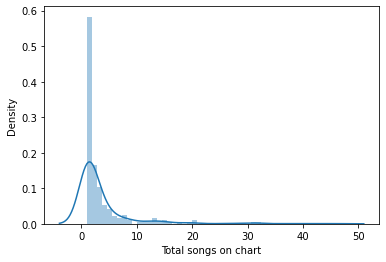

In [78]:
sns.distplot(num_of_chart_songs.sort_values('Total songs on chart')['Total songs on chart'])

/Users/virajvaghela/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Count of artists own songs on the chart', ylabel='Density'>

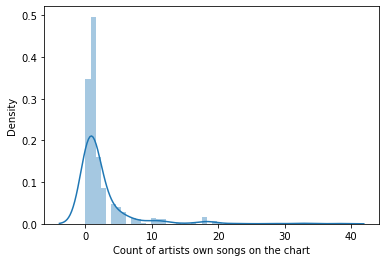

In [79]:
sns.distplot(num_of_chart_songs.sort_values('Count of artists own songs on the chart')['Count of artists own songs on the chart'])

/Users/virajvaghela/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Count of artists featured songs on the chart', ylabel='Density'>

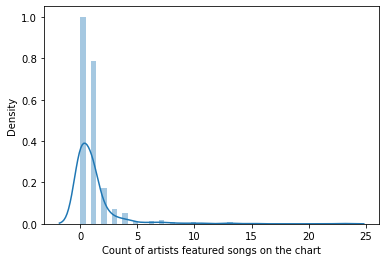

In [80]:
sns.distplot(num_of_chart_songs.sort_values('Count of artists featured songs on the chart')['Count of artists featured songs on the chart'])

After 10 OWN songs on the chart, its becomes less common, therefore it would be a good idea to use all the artists that have 10 or more OWN songs on the charts 

In [81]:
top_10_counts = num_of_chart_songs.sort_values('Total songs on chart', ascending = False).head(10)
top_10_counts

,Artist,Count of artists own songs on the chart,Count of artists featured songs on the chart,Total songs on chart
0,Bad Bunny,38.0,8.0,46.0
10,Juice WRLD,18.0,23.0,41.0
1,XXXTENTACION,33.0,4.0,37.0
3,Ariana Grande,28.0,4.0,32.0
2,Taylor Swift,32.0,0.0,32.0
11,Travis Scott,18.0,13.0,31.0
14,Drake,16.0,15.0,31.0
4,Post Malone,23.0,6.0,29.0
13,Lil Baby,18.0,10.0,28.0
15,Lil Uzi Vert,14.0,11.0,25.0


<AxesSubplot:xlabel='Artist', ylabel='Total songs on chart'>

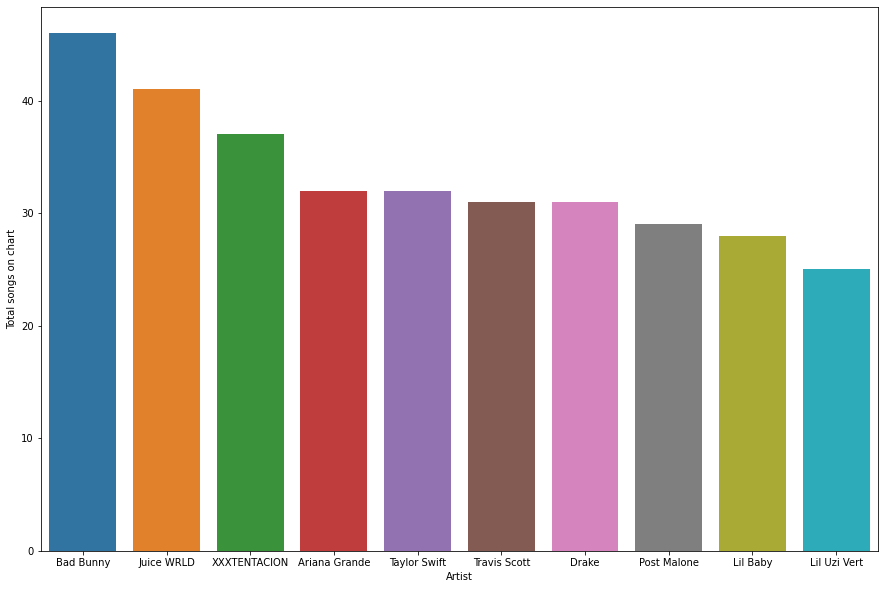

In [82]:
plt.figure(figsize=(15,10))
sns.barplot(data=top_10_counts, x='Artist', y='Total songs on chart')

In [83]:
top_10_feats = num_of_chart_songs.sort_values('Count of artists featured songs on the chart', ascending = False).head(10)

<AxesSubplot:xlabel='Artist', ylabel='Total songs on chart'>

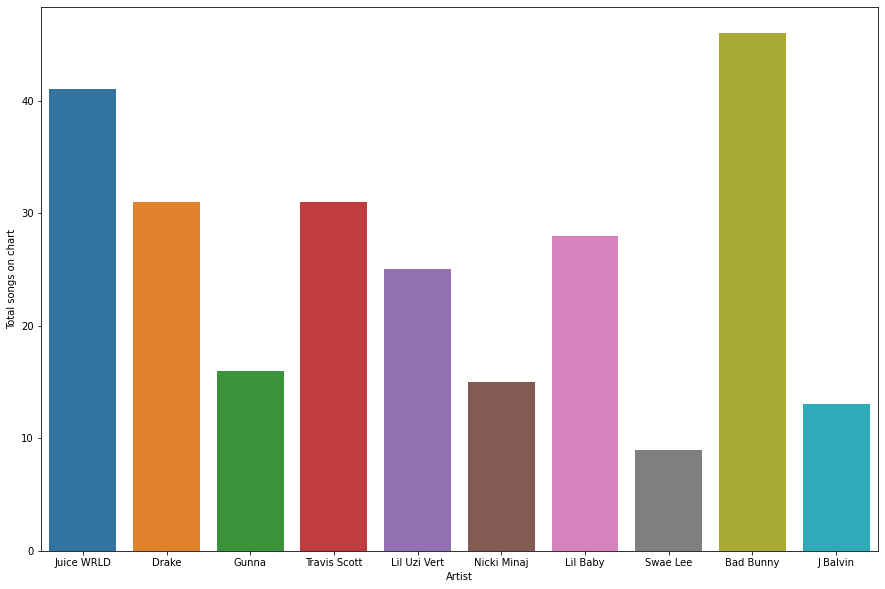

In [85]:
plt.figure(figsize=(15,10))
sns.barplot(data=top_10_feats, x='Artist', y='Total songs on chart')

In [86]:
top_own_artists = list(num_of_chart_songs.loc[num_of_chart_songs['Count of artists own songs on the chart']>=10]['Artist'])
top_feat_artists = list(num_of_chart_songs.loc[num_of_chart_songs['Count of artists featured songs on the chart']>=5]['Artist'])

In [87]:
print(len(top_own_artists))
print(len(top_feat_artists))

29
20


In [88]:
top_own_artists

['Bad Bunny',
 'XXXTENTACION',
 'Taylor Swift',
 'Ariana Grande',
 'Post Malone',
 'BTS',
 'Kid Cudi',
 'Future',
 'Eminem',
 'Playboi Carti',
 'Juice WRLD',
 'Travis Scott',
 'Billie Eilish',
 'Lil Baby',
 'Drake',
 'Lil Uzi Vert',
 'Pop Smoke',
 'Miley Cyrus',
 '21 Savage',
 'Mac Miller',
 'Ozuna',
 'Dua Lipa',
 'Ed Sheeran',
 'Khalid',
 'Cardi B',
 'J. Cole',
 'Trippie Redd',
 'The Kid LAROI',
 'DaBaby']

In [89]:
top_feat_artists

['Bad Bunny',
 'Post Malone',
 'Juice WRLD',
 'Travis Scott',
 'Lil Baby',
 'Drake',
 'Lil Uzi Vert',
 'DaBaby',
 'Marshmello',
 'Justin Bieber',
 'Roddy Ricch',
 'Nicki Minaj',
 'Halsey',
 'J Balvin',
 'Daddy Yankee',
 'Gunna',
 'Metro Boomin',
 'Young Thug',
 'Swae Lee',
 'YoungBoy Never Broke Again']

# For Streamlit

In [109]:
top_feat_artists2 = top_feat_artists.copy()

In [110]:
top_feat_artists2.append('No features') 

In [111]:
top_feat_artists2

['Bad Bunny',
 'Post Malone',
 'Juice WRLD',
 'Travis Scott',
 'Lil Baby',
 'Drake',
 'Lil Uzi Vert',
 'DaBaby',
 'Marshmello',
 'Justin Bieber',
 'Roddy Ricch',
 'Nicki Minaj',
 'Halsey',
 'J Balvin',
 'Daddy Yankee',
 'Gunna',
 'Metro Boomin',
 'Young Thug',
 'Swae Lee',
 'YoungBoy Never Broke Again',
 'No features']

In [113]:
final_data.head(1)

,acousticness,danceability,duration_ms,energy,explicit,Song ID,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,Number of days on charts,Charted,Main_artist,Featured_artist
9087,0.887,0.319,187333,0.201,0,1hx7X9cMXHWJjknb9O6Ava,0.0,7,0.904,-17.796,1,The September Of My Years - Live At The Sands ...,27,0.0623,117.153,0.239,2018,0.0,0.0,Frank Sinatra,No features


In [112]:
test2 = final_data.copy()

In [114]:
test2['Main_artist'] = test2['Main_artist'].apply(lambda x: str(x) if str(x) in top_own_artists else 'Other')

In [116]:
test2['Featured_artist'] = test2['Featured_artist'].apply(lambda x: str(x) if str(x) in top_feat_artists2 else 'Other')

In [120]:
test2.to_csv('Cleaned_spotify_data2', index=False)

# End of Streamlit Code

In [121]:
#############################################################

In [420]:
test = final_data.copy()

In [421]:
Main_dummies= pd.get_dummies(data = test, columns=['Main_artist'], prefix_sep='', prefix='')

In [422]:
Main_dummies = Main_dummies.drop(columns=[col for col in Main_dummies if col not in top_own_artists])
Main_dummies.columns

Index(['21 Savage', 'Ariana Grande', 'BTS', 'Bad Bunny', 'Billie Eilish',
       'Cardi B', 'DaBaby', 'Drake', 'Dua Lipa', 'Ed Sheeran', 'Eminem',
       'Future', 'J. Cole', 'Juice WRLD', 'Khalid', 'Kid Cudi', 'Lil Baby',
       'Lil Uzi Vert', 'Mac Miller', 'Miley Cyrus', 'Ozuna', 'Playboi Carti',
       'Pop Smoke', 'Post Malone', 'Taylor Swift', 'The Kid LAROI',
       'Travis Scott', 'Trippie Redd', 'XXXTENTACION'],
      dtype='object')

In [423]:
Feat_dummies= pd.get_dummies(data = test, columns=['Featured_artist'], prefix_sep='', prefix='')
Feat_dummies = Feat_dummies.drop(columns=[col for col in Feat_dummies if col not in top_feat_artists])
Feat_dummies = Feat_dummies.add_prefix('feat.')
Feat_dummies.columns

Index(['feat.Bad Bunny', 'feat.DaBaby', 'feat.Daddy Yankee', 'feat.Drake',
       'feat.Gunna', 'feat.Halsey', 'feat.J Balvin', 'feat.Juice WRLD',
       'feat.Justin Bieber', 'feat.Lil Baby', 'feat.Lil Uzi Vert',
       'feat.Marshmello', 'feat.Metro Boomin', 'feat.Nicki Minaj',
       'feat.Post Malone', 'feat.Roddy Ricch', 'feat.Swae Lee',
       'feat.Travis Scott', 'feat.Young Thug',
       'feat.YoungBoy Never Broke Again'],
      dtype='object')

In [424]:
dummies = pd.merge(Main_dummies, Feat_dummies, left_index=True, right_index=True, how='outer')

In [425]:
final_data = pd.merge(final_data, dummies, left_index=True, right_index=True)

In [426]:
final_data.shape

(10585, 70)

In [427]:
final_data.head(1)

,acousticness,danceability,duration_ms,energy,explicit,Song ID,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,Number of days on charts,Charted,Main_artist,Featured_artist,21 Savage,Ariana Grande,BTS,Bad Bunny,Billie Eilish,Cardi B,DaBaby,Drake,Dua Lipa,Ed Sheeran,Eminem,Future,J. Cole,Juice WRLD,Khalid,Kid Cudi,Lil Baby,Lil Uzi Vert,Mac Miller,Miley Cyrus,Ozuna,Playboi Carti,Pop Smoke,Post Malone,Taylor Swift,The Kid LAROI,Travis Scott,Trippie Redd,XXXTENTACION,feat.Bad Bunny,feat.DaBaby,feat.Daddy Yankee,feat.Drake,feat.Gunna,feat.Halsey,feat.J Balvin,feat.Juice WRLD,feat.Justin Bieber,feat.Lil Baby,feat.Lil Uzi Vert,feat.Marshmello,feat.Metro Boomin,feat.Nicki Minaj,feat.Post Malone,feat.Roddy Ricch,feat.Swae Lee,feat.Travis Scott,feat.Young Thug,feat.YoungBoy Never Broke Again
9087,0.887,0.319,187333,0.201,0,1hx7X9cMXHWJjknb9O6Ava,0.0,7,0.904,-17.796,1,The September Of My Years - Live At The Sands ...,27,0.0623,117.153,0.239,2018,0.0,0.0,Frank Sinatra,No features,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [428]:
final_data.Charted.value_counts()

0.0    9435
1.0    1150
Name: Charted, dtype: int64

In [431]:
final_data.isnull().sum()

acousticness                       0
danceability                       0
duration_ms                        0
energy                             0
explicit                           0
Song ID                            0
instrumentalness                   0
key                                0
liveness                           0
loudness                           0
mode                               0
name                               0
popularity                         0
speechiness                        0
tempo                              0
valence                            0
year                               0
Number of days on charts           0
Charted                            0
Main_artist                        0
Featured_artist                    0
21 Savage                          0
Ariana Grande                      0
BTS                                0
Bad Bunny                          0
Billie Eilish                      0
Cardi B                            0
D

In [432]:
final_data.to_csv('Cleaned_spotify_data', index=False)